# 패키지 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

# 이미지 불러오기
### ※ 이미지 경로 설정 필요 !!

In [2]:
# 이미지 랜덤으로 불러오는 코드
PATH = r'D:\MODEL_DATA\AA\2.json'
temp_img = np.asarray(pd.read_json(PATH).iloc[np.random.randint(1000)])

# 사이즈 변환

In [3]:
# 0번째 값 : 카테고리 번호, 1번째 값 : 제품 번호, 2번째 값 : 이미지 벡터
temp_img = np.asarray(temp_img[2]).reshape(224,224,3)
temp_img.shape

(224, 224, 3)

&lt;matplotlib.image.AxesImage at 0x199f17f5608&gt;

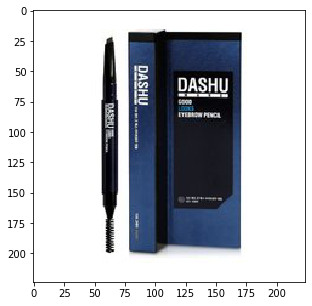

In [4]:
# 원본 이미지
plt.figure(figsize=(5, 5))
plt.imshow(temp_img,
            cmap=plt.cm.bone)

# 투명화 진행, 라벨링 병행

In [5]:
temp_img = temp_img.reshape(224*224,3)
temp_img.shape

(50176, 3)

In [6]:
cutOff = 240
newData = []
label_map = []

for item in temp_img:
    # RGB의 각 요소가 모두 cutOff 이상이면 transparent하게 바꿔줍니다.
    if item[0] >= cutOff and item[1] >= cutOff and item[2] >= cutOff:
        newData.append((255, 255, 255, 0))
        label_map.append((0,0,0))
    # 나머지 요소는 변경하지 않습니다.
    else:
        newData.append((item[0], item[1], item[2], 255))
        label_map.append((255,255,255))
        
# 데이터 저장 부분인 듯
# img.putdata(newData)
# img.save("생성할 파일명.png", "PNG") # PNG 포맷으로 저장합니다.

&lt;matplotlib.image.AxesImage at 0x199f1cd6088&gt;

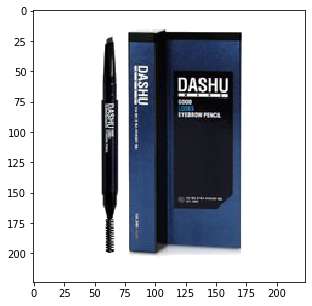

In [7]:
# 투명화 후 이미지
plt.figure(figsize=(5, 5))
plt.imshow(np.asarray(newData).reshape(224,224,4))

# 라벨 map을 통해서 박스 boundary 찾기

In [8]:
test_label = np.asarray(label_map).reshape(224,224,-1)

&lt;matplotlib.image.AxesImage at 0x19981998e08&gt;

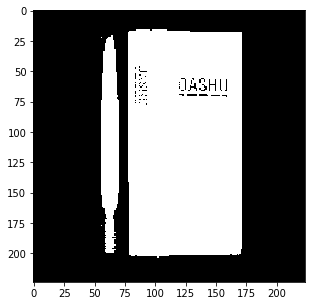

In [14]:
# 라벨이 있는 곳 흰색
plt.figure(figsize=(5, 5))
plt.imshow(test_label, cmap='gray')

In [10]:
# bondary 탐색
x_min = 224
x_max = 0
y_min = 224
y_max = 0
for i in range(224):
    for j in range(224):
        if test_label[i][j].tolist() != [0,0,0]:
            x_min = min(x_min, i)
            x_max = max(x_max, i)
            y_min = min(y_min, j)
            y_max = max(y_max, j)

In [11]:
# Bondary 빨간색으로 변환
test_box_label = copy.deepcopy(test_label)
for i in range(x_min, x_max):
    test_box_label[i][y_min] = (255,0,0)
    test_box_label[i][y_max] = (255,0,0)
for j in range(y_min, y_max):
    test_box_label[x_min][j] = (255,0,0)
    test_box_label[x_max][j] = (255,0,0)

&lt;matplotlib.image.AxesImage at 0x1998192b688&gt;

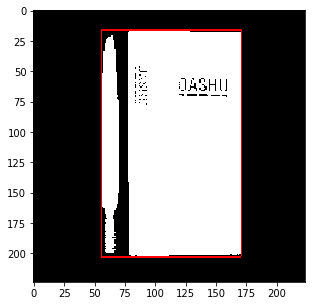

In [13]:
# 라벨 박스
plt.figure(figsize=(5, 5))
plt.imshow(test_box_label)